In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv('/content/drive/MyDrive/internet_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/churn_data.csv')
df3 = pd.read_csv('/content/drive/MyDrive/customer_data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No


In [ ]:
df2

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df3

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes


Merging the 3 datasets on column = 'customerID'

In [ ]:
df = pd.merge(df1,df2, on='customerID')

In [ ]:
df = pd.merge(df,df3, on='customerID')
df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


Checking for null values

In [ ]:
df.isnull().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [ ]:
df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [ ]:
df.dtypes

customerID           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

Checking for missing values

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print()

3765-JXVKY    1
4226-KKDON    1
7298-IZWLY    1
6890-PFRQX    1
6497-TILVL    1
             ..
2888-ADFAO    1
2096-XOTMO    1
7242-EDTYC    1
8931-GJJIQ    1
5442-PPTJY    1
Name: customerID, Length: 7042, dtype: int64

No                  3389
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2421
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2043
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2706
No internet service    1526
Name: Stre

TotalCharges has 11 rows with value blank, so dropping those rows

In [ ]:
df = df.drop(labels=df[df['TotalCharges'] == " "].index)

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print()

3765-JXVKY    1
4226-KKDON    1
7298-IZWLY    1
6890-PFRQX    1
6497-TILVL    1
             ..
4011-ARPHK    1
2888-ADFAO    1
2096-XOTMO    1
7242-EDTYC    1
5442-PPTJY    1
Name: customerID, Length: 7031, dtype: int64

No                  3384
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3095
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2014
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3086
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2417
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2039
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes                    2702
No internet service    1520
Name: Stre

In [ ]:
df.shape

(7031, 21)

Binary Mapping. 

Yes : 1, No : 0

In [ ]:
def binary_map(series):
  m_series = series.map({'Yes': 1, 'No': 0})
  return m_series


In [ ]:
df[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']] = df[['PhoneService','PaperlessBilling','Churn','Partner','Dependents']].apply(binary_map, axis=1)

In [ ]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.5,0,0,0,0,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0,0


getting dummy values for all categorical columns

In [ ]:
df_dummy = pd.get_dummies(df[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','InternetService','Contract','PaymentMethod']])

In [ ]:
df_dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


Checking dependency of 'Churn' column on different columns

In [ ]:
import seaborn as sns
def countplot_fn(x,y,df):
  plt.figure(figsize=(25,10))
  sns.countplot(df[x],hue=df[y])
  #plt.xticks(rotation=90)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


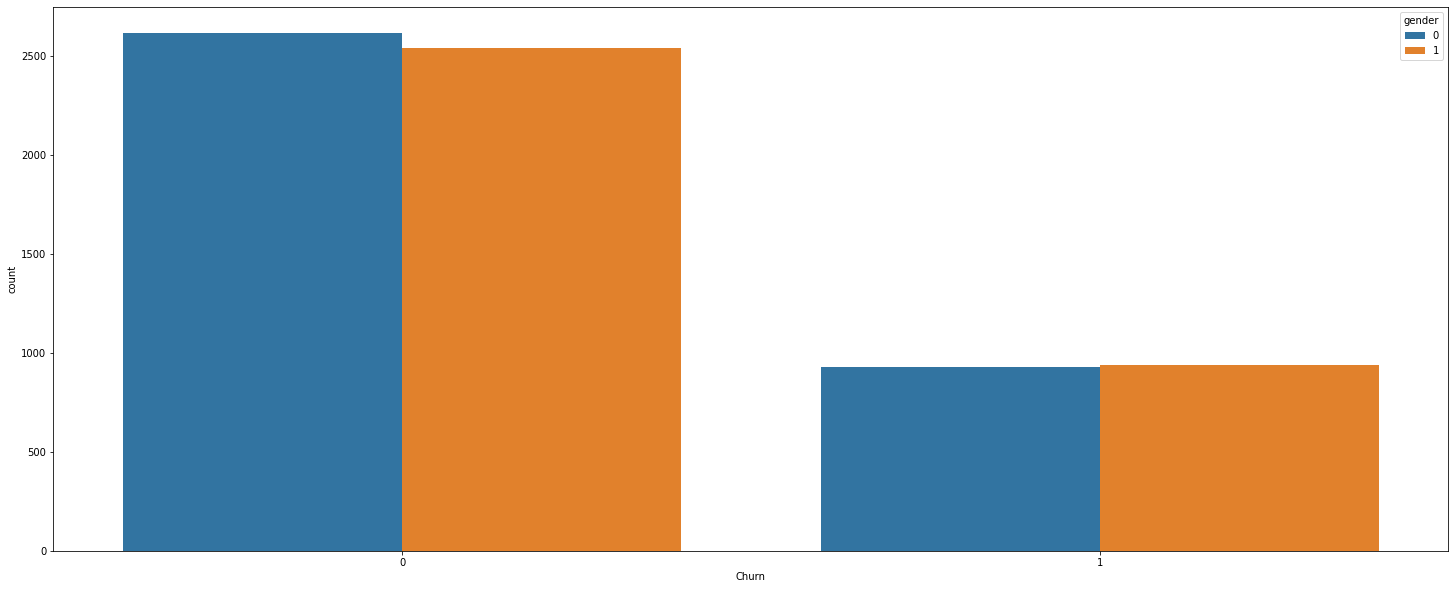

In [ ]:
countplot_fn('Churn','gender',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


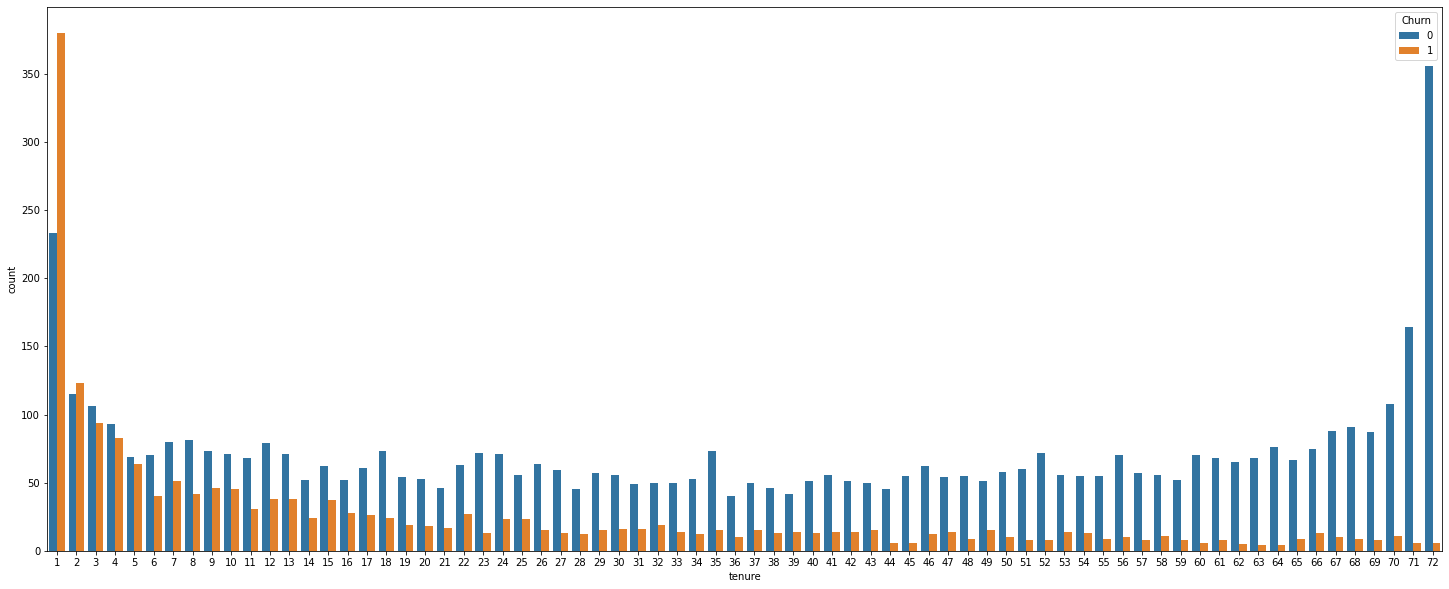

In [ ]:
countplot_fn('tenure','Churn',df)

Churn rate is decreasing with the increase in tenure

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


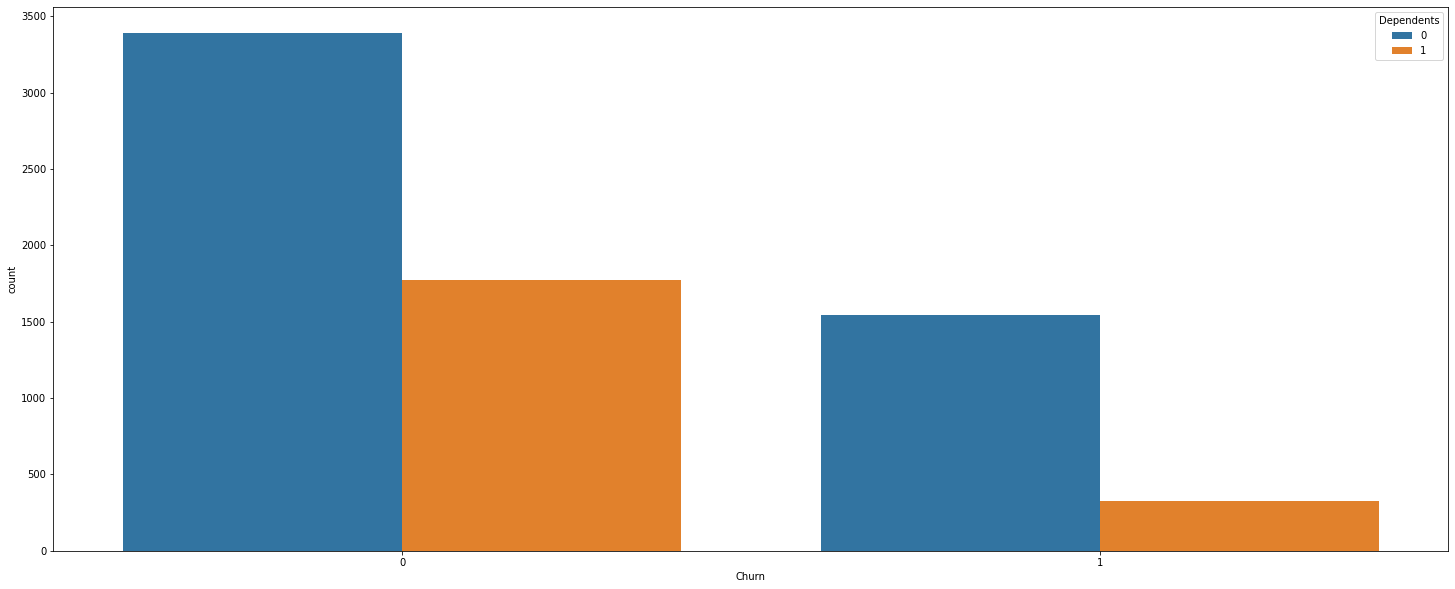

In [ ]:
countplot_fn('Churn','Dependents',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


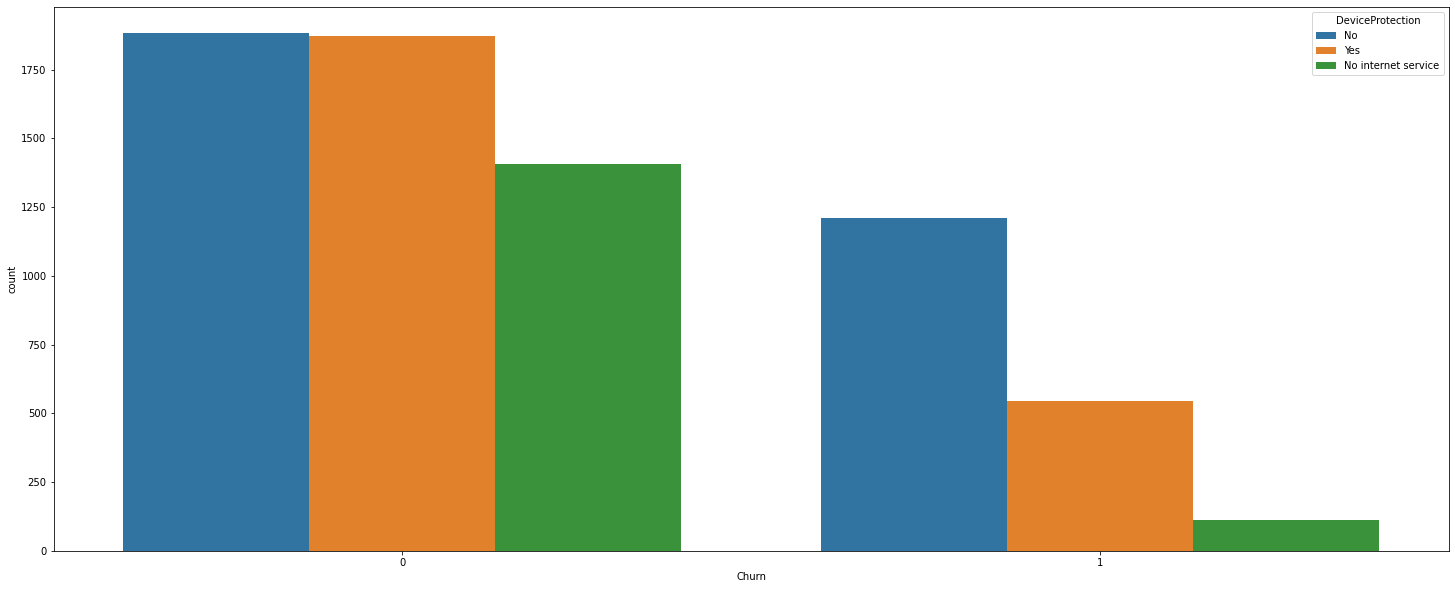

In [ ]:
countplot_fn('Churn','DeviceProtection',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


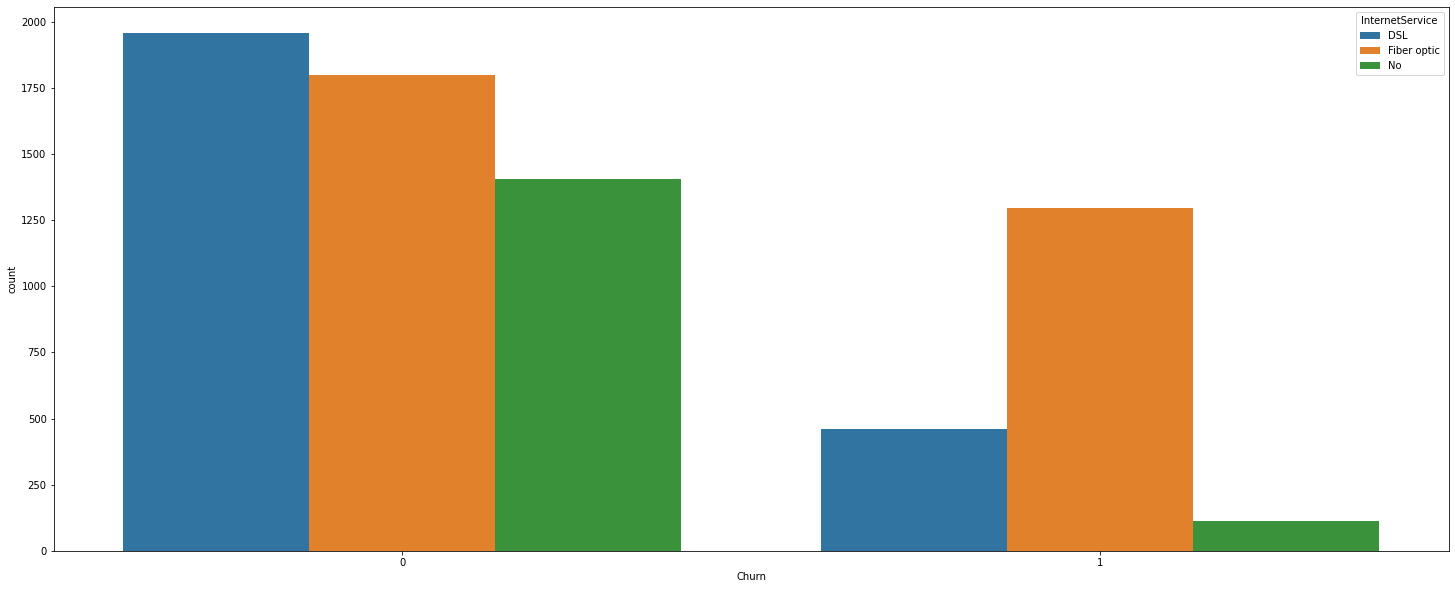

In [ ]:
countplot_fn('Churn','InternetService',df)

Churn rate is high, if there is Fibre Optic for internet service

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


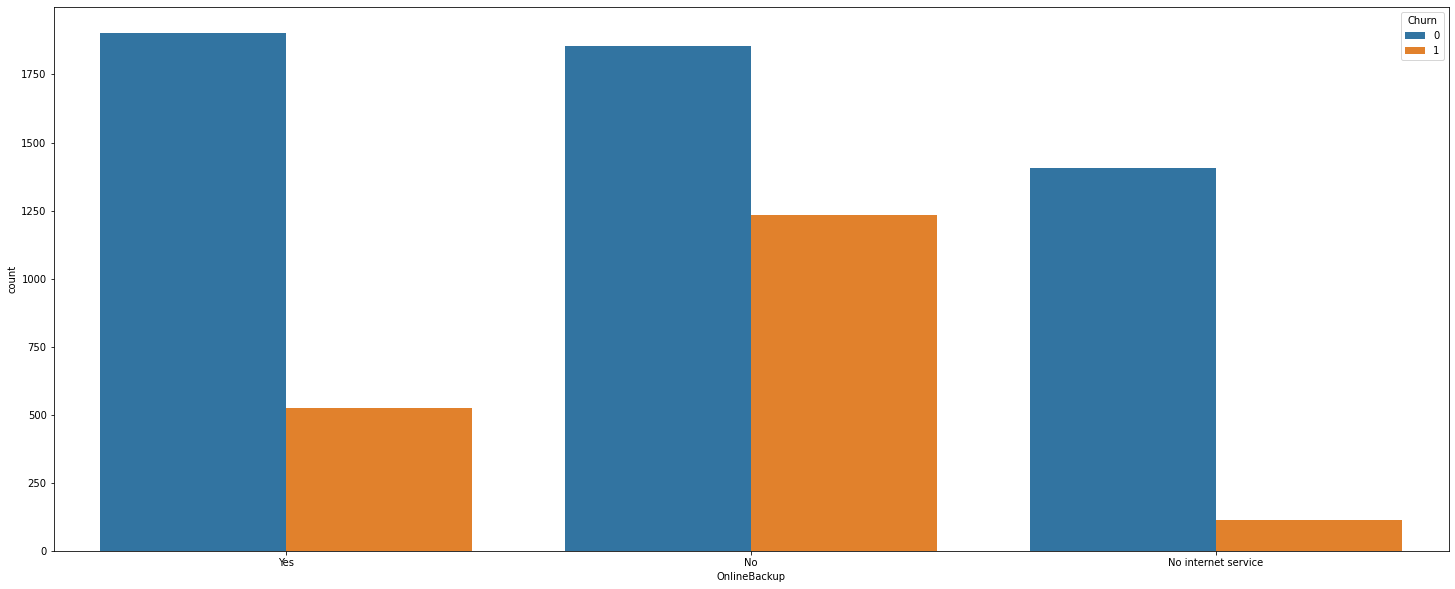

In [ ]:
countplot_fn('OnlineBackup','Churn',df)

Churn rate is low if there is online backup

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


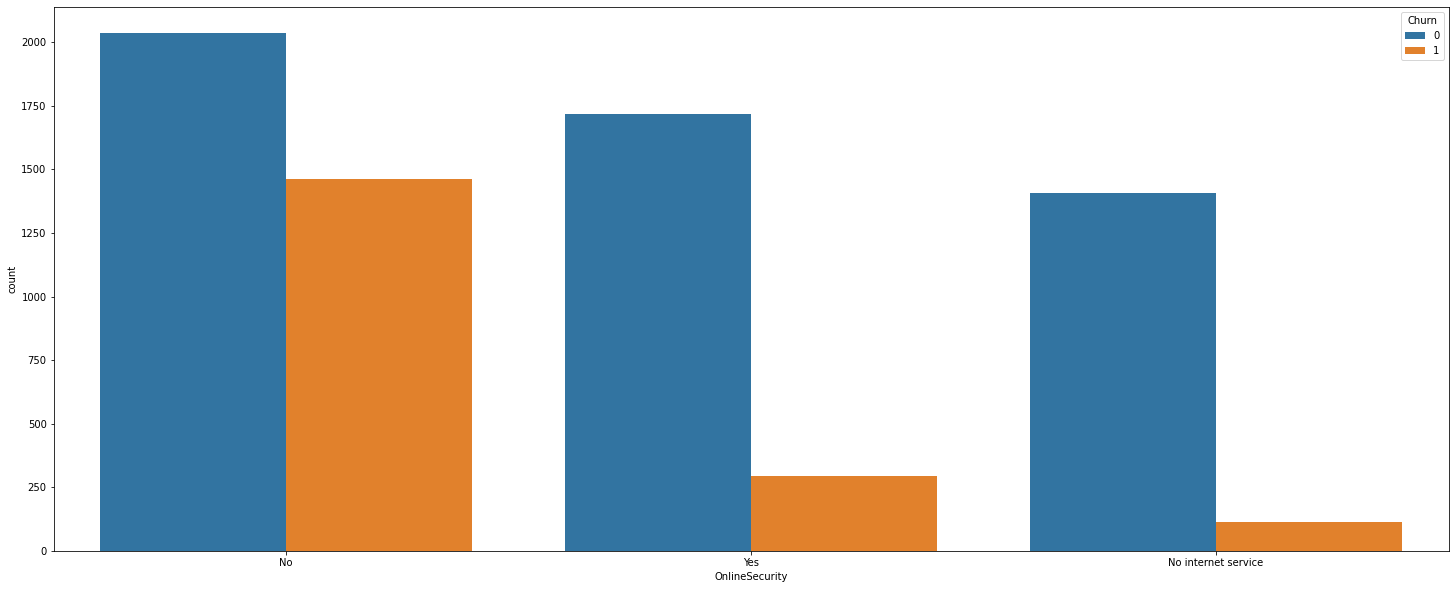

In [ ]:
countplot_fn('OnlineSecurity','Churn',df)

Churn rate is low if there is online security

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


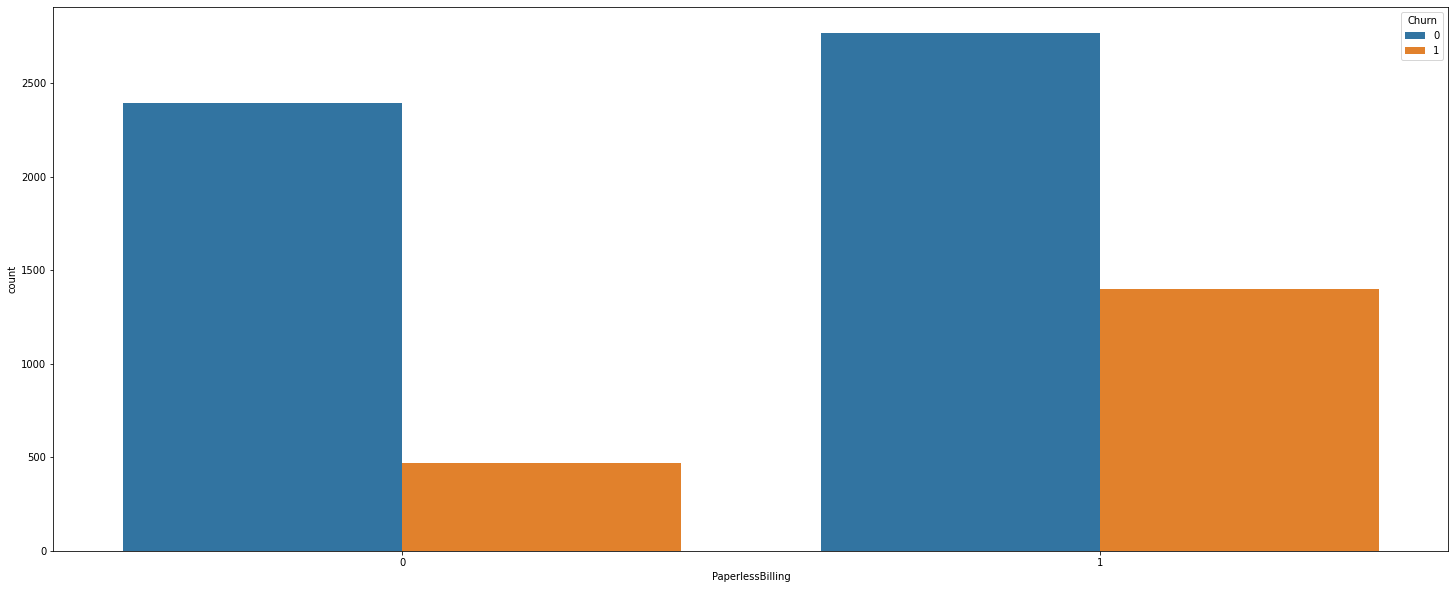

In [ ]:
countplot_fn('PaperlessBilling','Churn',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


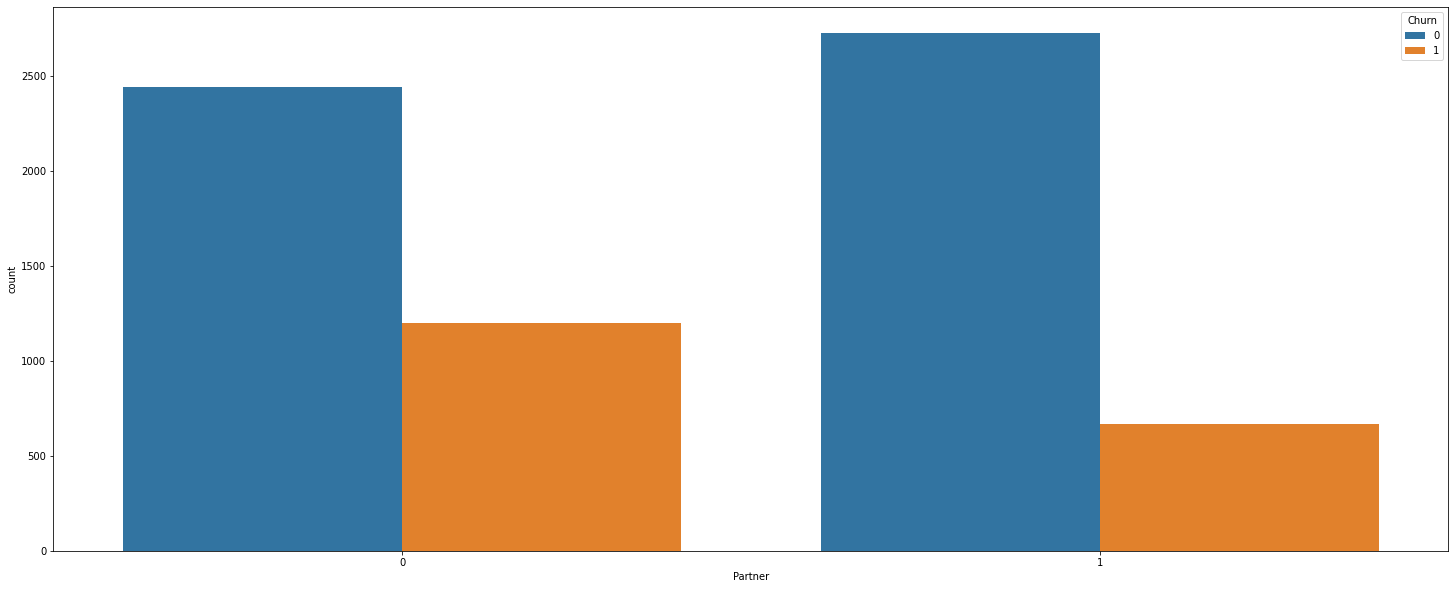

In [ ]:
countplot_fn('Partner','Churn',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


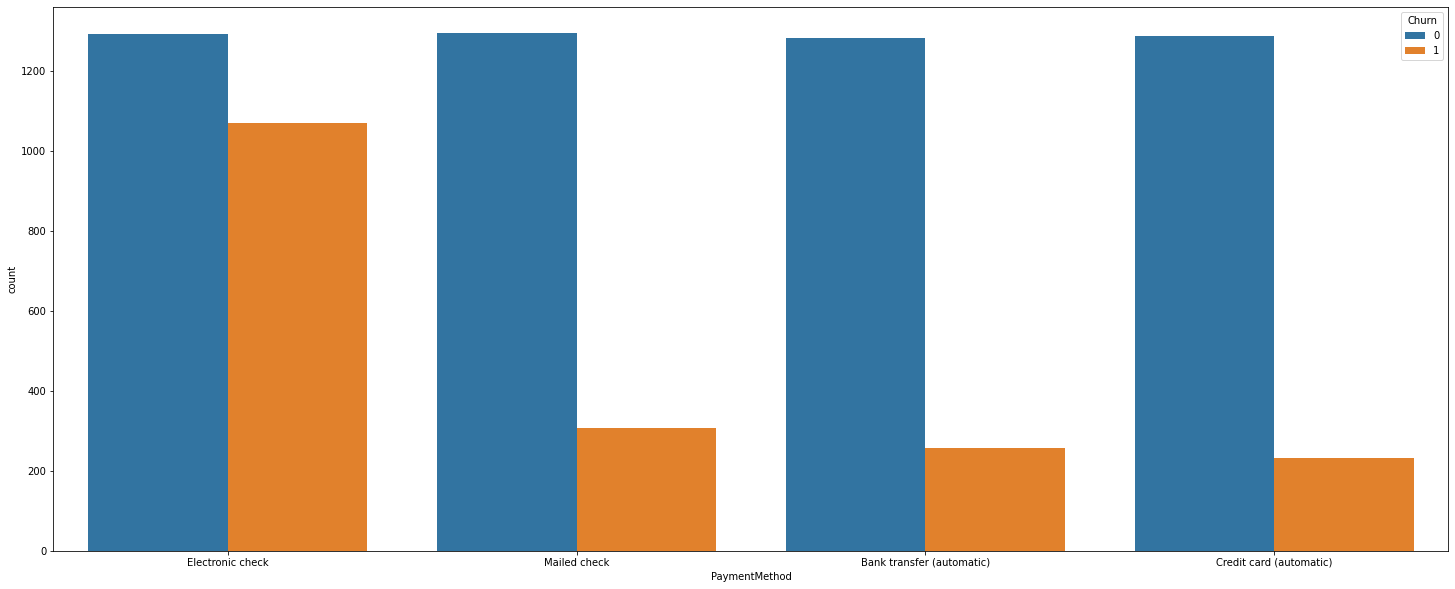

In [ ]:
countplot_fn('PaymentMethod','Churn',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


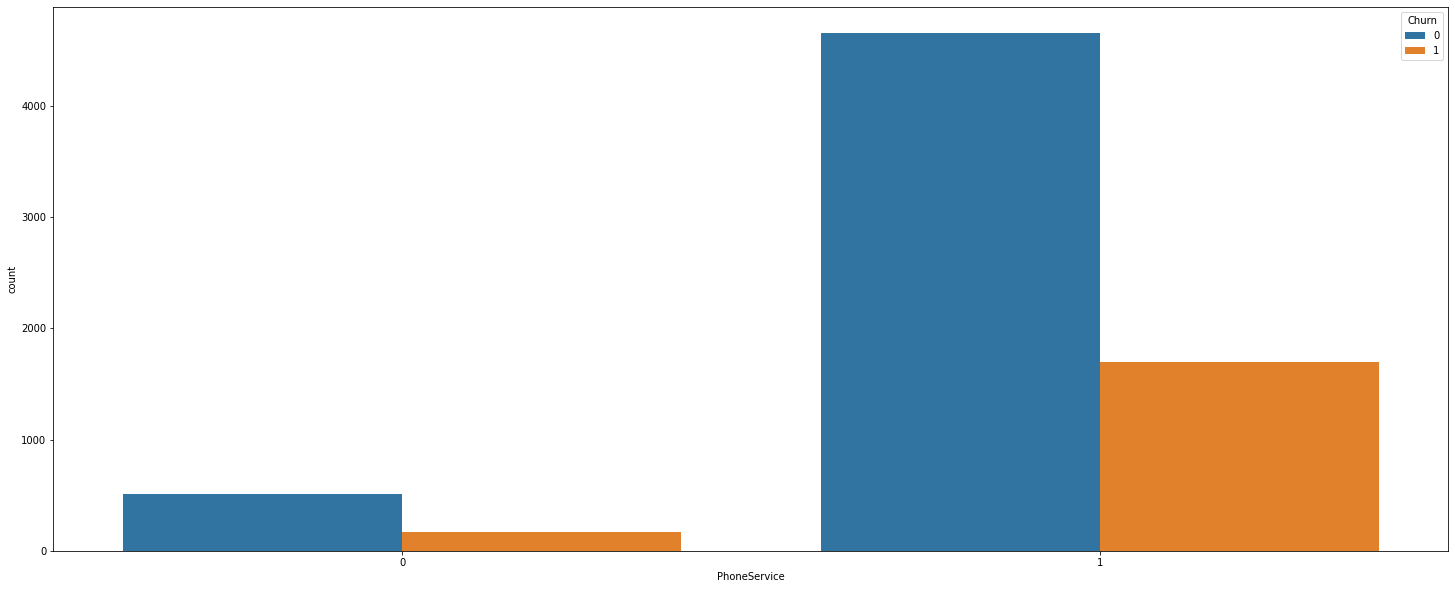

In [ ]:
countplot_fn('PhoneService','Churn',df)

Churn rate is low if there is phone service

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


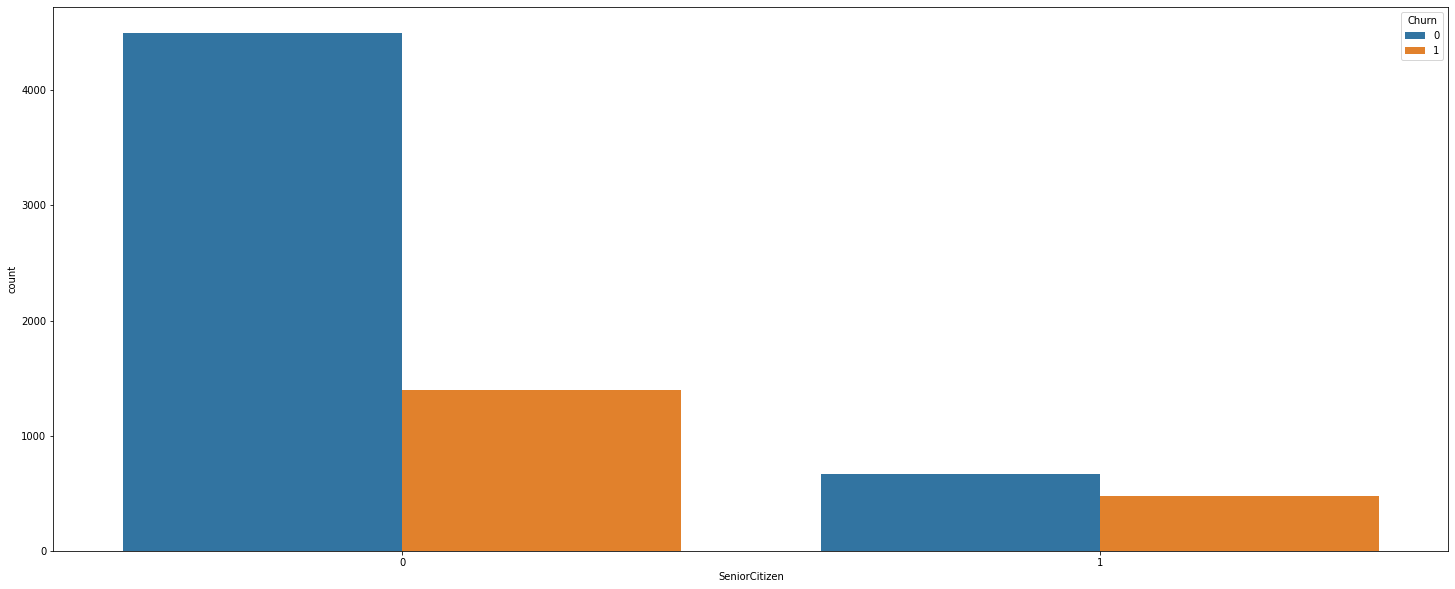

In [ ]:
countplot_fn('SeniorCitizen','Churn',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


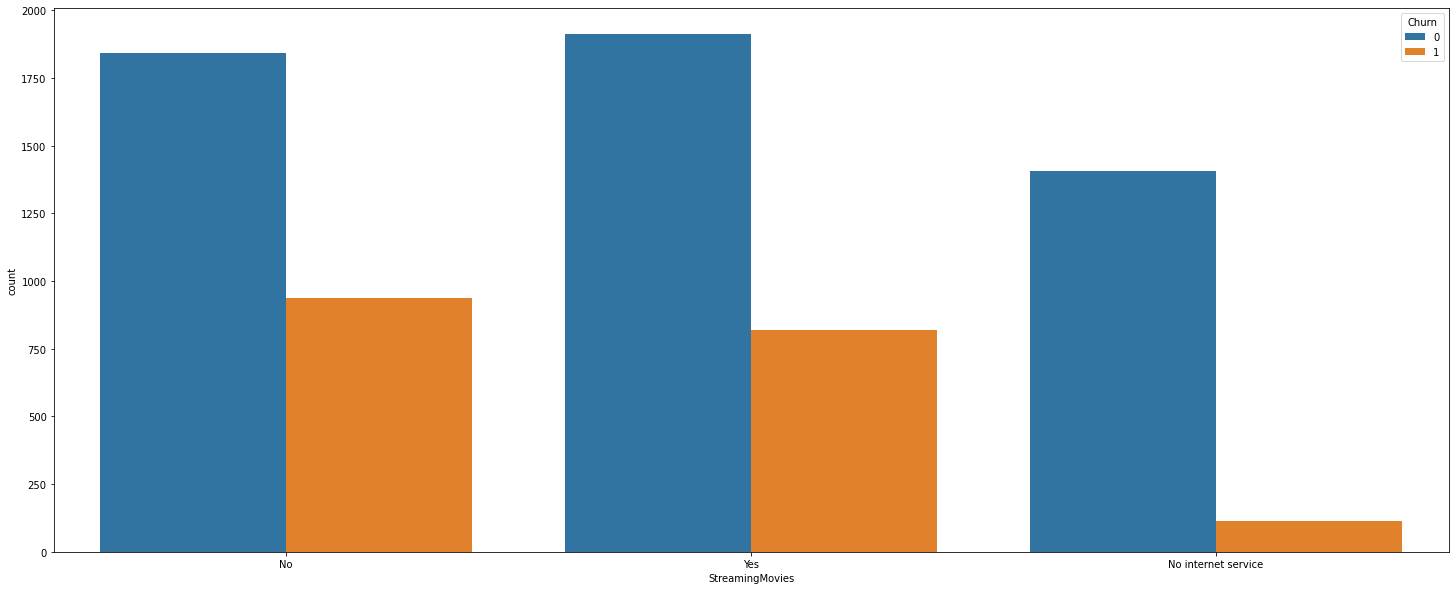

In [ ]:
countplot_fn('StreamingMovies','Churn',df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


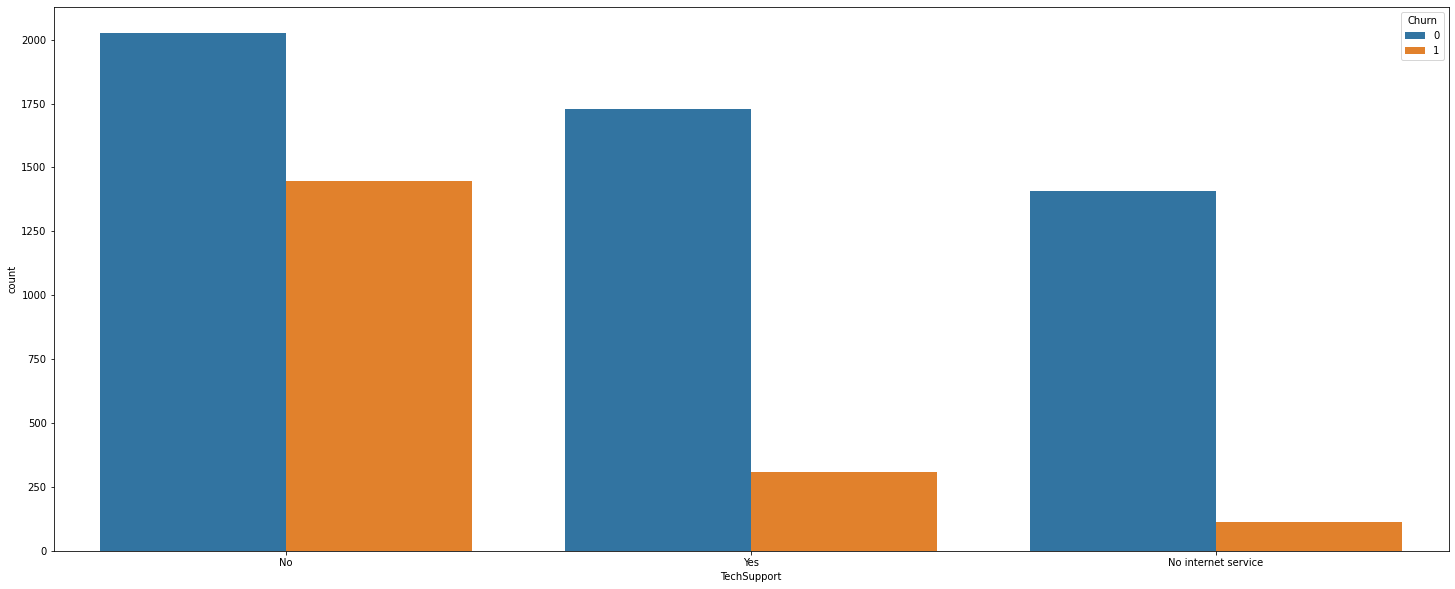

In [ ]:
countplot_fn('TechSupport','Churn',df)

Churn rate is low if there is tech support

In [ ]:
#plt.figure(figsize=(40,20))
#sns.countplot(df['TotalCharges'],hue=df['Churn'])
#plt.xticks(rotation=90)

Churn rate is dependent on : tenure, internet service, online backup, online security, phone service and tech support

In [ ]:
#dropping columns from original df whose dummy columns are created
df = df.drop(columns=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','InternetService','Contract'])

In [ ]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,1,29.85,29.85,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,1,0,0,0


In [ ]:
df_concat = pd.concat([df,df_dummy],axis=1)
df_concat.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
df_concat = df_concat.drop(columns=['customerID'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


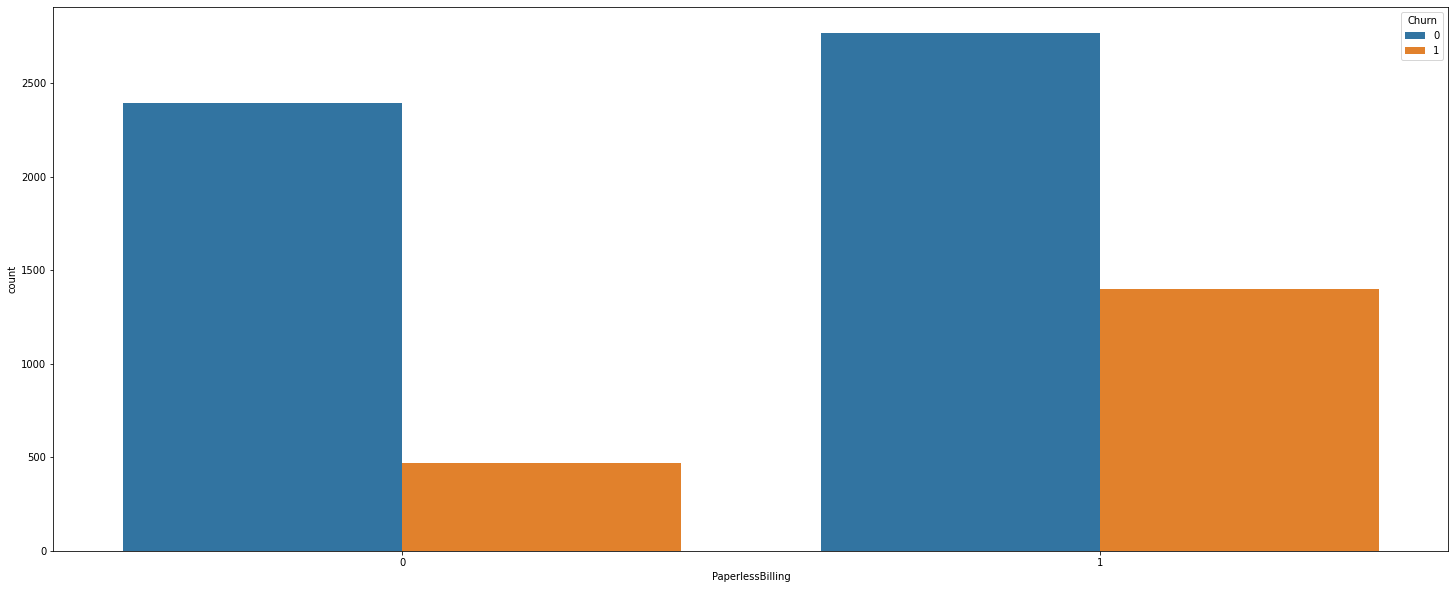

In [ ]:
countplot_fn('PaperlessBilling','Churn',df_concat)

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [ ]:
x = df_concat['TechSupport_Yes']
y = df_concat['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4710,), (2321,), (4710,), (2321,))

In [ ]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This states that one varibale isnt sufficient to predict

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1710
           1       0.00      0.00      0.00       611

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1 is not predicted, so increase dependent variabled

In [ ]:
X = df_concat.drop(columns = 'Churn')
Y = df_concat['Churn']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4710, 1), (2321, 1), (4710, 1), (2321, 1))

In [ ]:
# to overcome the error of 'reached max limit of iterations, either scale the data or increase the max interations
#scaling the data
def scaling(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

In [ ]:
df_numeric_columns = list(df_concat.select_dtypes(include = ['int64', 'float64']).columns)
df_numeric_columns.remove('Churn')

In [ ]:
norm_X_train = X_train
norm_X_test = X_test
norm_X_train[df_numeric_columns] = X_train[df_numeric_columns].apply(scaling, axis = 0)
norm_X_test[df_numeric_columns] = X_test[df_numeric_columns].apply(scaling, axis = 0)

norm_X_train.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4.710000e+03,4.710000e+03,4.710000e+03,4.710000e+03,4.710000e+03,4.710000e+03,4.710000e+03,4.710000e+03,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4710.00000,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000
mean,-1.234681e-16,-1.341319e-15,-2.521691e-16,-3.022011e-15,-1.904586e-17,2.639078e-16,-3.807287e-16,-3.195839e-16,0.483439,0.098514,0.418047,0.495329,0.217834,0.286837,0.432484,0.217834,0.349682,0.436730,0.217834,0.345435,0.494904,0.217834,0.287261,0.393631,0.217834,0.388535,0.390870,0.217834,0.391295,0.339703,0.442463,0.217834,0.549894,0.21104,0.239066,0.214862,0.219533,0.340552,0.225053
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499779,0.298040,0.493290,0.500031,0.412818,0.452333,0.495473,0.412818,0.476920,0.496033,0.412818,0.475560,0.500027,0.412818,0.452532,0.488606,0.412818,0.487469,0.487997,0.412818,0.488092,0.473659,0.496731,0.412818,0.497557,0.40809,0.426558,0.410770,0.413974,0.473945,0.417662
min,-1.282386e+00,-3.024718e+00,-1.209045e+00,-1.544981e+00,-9.755639e-01,-4.471661e-01,-9.701894e-01,-6.562391e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.565207e-01,3.305391e-01,-1.209045e+00,-9.741038e-01,-9.755639e-01,-4.471661e-01,-9.701894e-01,-6.562391e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.418570e-01,3.305391e-01,8.269231e-01,1.846491e-01,-9.755639e-01,-4.471661e-01,-9.701894e-01,-6.562391e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.172058e-01,3.305391e-01,8.269231e-01,8.359553e-01,1.024831e+00,-4.471661e-01,1.030508e+00,1.523511e+00,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.609670e+00,3.305391e-01,8.269231e-01,1.783272e+00,1.024831e+00,2.235831e+00,1.030508e+00,1.523511e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [ ]:
lg_clf_2 = LogisticRegression()
rfe = RFE(lg_clf_2, 11) # 'i' is the number of features to be selected by RFE to fit a logistic regression model on norm_X_train and y_train.
rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

rfe_features = list(norm_X_train.columns[rfe.support_]) # A list of important features chosen by RFE.
rfe_X_train = norm_X_train[rfe_features]
  
# Build a logistic regression model using the features selected by RFE.
lg_clf_3 = LogisticRegression()
lg_clf_3.fit(rfe_X_train, y_train)
  
# Predicting 'y' values only for the test set as generally, they are predicted quite accurately for the train set.
y_test_pred = lg_clf_3.predict(norm_X_test[rfe_features])

f1_scores_array = f1_score(y_test, y_test_pred, average = None)
dict_rfe = {"features": list(rfe_features), "f1_score": f1_scores_array} # 'i' is the number of features to be selected by RFE.

ValueError: ignored

In [ ]:
dict_rfe

{'f1_score': array([0.86912181, 0.58453237]),
 'features': ['tenure',
  'MultipleLines_No',
  'OnlineSecurity_No',
  'TechSupport_No',
  'StreamingTV_Yes',
  'StreamingMovies_No internet service',
  'StreamingMovies_Yes',
  'InternetService_Fiber optic',
  'Contract_Month-to-month',
  'Contract_Two year',
  'PaymentMethod_Electronic check']}

In [ ]:
#So,the f1 score is good with 9 variables included, after 9 there is not much increment in the score

Implementing the model

In [ ]:
features = list(rfe_features)
X = df_concat[features]
Y = df_concat['Churn']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.427373
         Iterations 8
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.262    
Dependent Variable:         Churn                  AIC:                    6031.7141
Date:                       2021-02-17 15:48       BIC:                    6107.1531
No. Observations:           7031                   Log-Likelihood:         -3004.9  
Df Model:                   10                     LL-Null:                -4071.4  
Df Residuals:               7020                   LLR p-value:            0.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             8.0000                                                  
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975

Logistic Regression Model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting test result and checking accuracy

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1381  163]
 [ 267  299]]


Result is telling us that we have 1379 + 295 correct predictions and 165 + 271 wrong predictions

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1544
           1       0.65      0.53      0.58       566

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



ROC curve

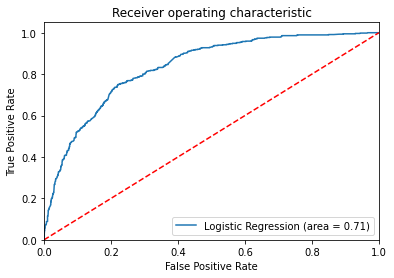

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).